## Importing Necessary Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path , delimiter=',') 
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:] 
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY) 
        path_XYs.append(XYs)
    return path_XYs

In [3]:
colours = ['black']
def plot(path_XYs,save_path):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(path_XYs): 
        c = colours[i % len(colours)] 
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2) 
    ax.set_aspect('equal')
    ax.axis('off')
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()

## Input Path

In [107]:
path_inp = "problems/frag1.csv" # give path to input csv here
path_XYs = read_csv(path_inp)

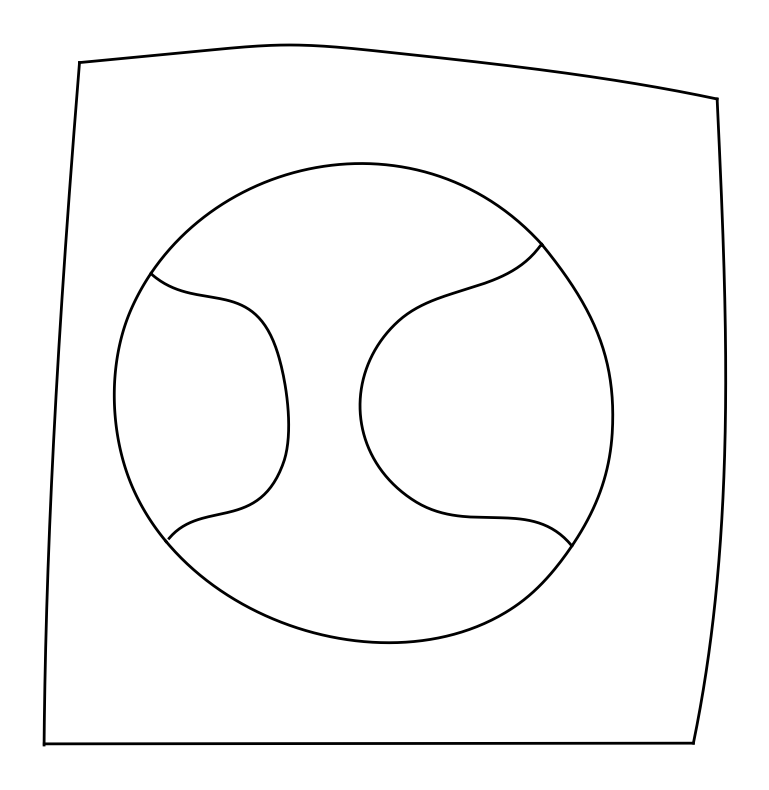

In [108]:
plot(path_XYs,"image.png")

In [105]:
def detect_shapes(contour):
    # Initialize shape name
    shape = "unidentified"

    # Approximate the contour
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    if len(approx) == 3:
        shape = "triangle"
    elif len(approx) == 4:
        x1 ,y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
            shape ="square"
        else:
            shape ="rectangle"
    elif len(approx) == 5:
        shape = "pentagon"
    elif len(approx) == 10:
        shape = "star"
    else:
        # Calculate contour area and perimeter
        contour_area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        if contour_area > 0:
            circularity = (4 * np.pi * contour_area) / (perimeter ** 2)
            if 0.7 < circularity < 1.2: 
                shape = "circle"
            elif 0.3 < circularity < 0.7:
                shape = "ellipse"
#         shape = "circle"

    return shape

## Regularization

In [109]:
img = cv2.imread("image.png")

# converting image to gray scale image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# adding the threshold value

_,threshold = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)

# using a findContour function

contours,_ = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

shape=set()
i=0
divMinSize=0.125
divMaxSize=0.175
# list for shorting names of all the shapes
color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
# sd = ShapeDetector()
for contour in contours:
    if i==0:
        i=1
        continue
        
    sh = detect_shapes(contour)
    
    if sh!="unidentified":
        shape.add(sh)
    
print("Regular Shapes detected:", shape)

Regular Shapes detected: {'ellipse', 'circle', 'square'}


## Symmetry

In [110]:
def detect_symmetry(shape_name):
    symmetry = {
        "circle": "rotational",
        "square": "vertical, horizontal, rotational",
        "rectangle": "vertical, horizontal",
        "triangle": "depends on type (e.g., equilateral, isosceles)",
        "ellipse": "vertical, horizontal",
        "pentagon": "rotational",
        "star": "rotational (if regular)"
    }

    return symmetry.get(shape_name, "unknown")

In [112]:
for sh in shape:
    print(f"The symmetry of a {sh} is: {detect_symmetry(sh)}")

The symmetry of a ellipse is: vertical, horizontal
The symmetry of a circle is: rotational
The symmetry of a square is: vertical, horizontal, rotational
